**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples

**Import data**

In [2]:
data = pd.ExcelFile("C:\\Users\\sonja tilly.ABERDEEN\\bdfds kmeans.xlsx")

# read tabs

funds = data.parse('funds').fillna(0).transpose()
indices = data.parse('indices').fillna(0).transpose()

indices.head(1)

,09/03/2017 To 10/03/2017,10/03/2017 To 13/03/2017,13/03/2017 To 14/03/2017,14/03/2017 To 15/03/2017,15/03/2017 To 16/03/2017,16/03/2017 To 17/03/2017,17/03/2017 To 20/03/2017,20/03/2017 To 21/03/2017,21/03/2017 To 22/03/2017,22/03/2017 To 23/03/2017,...,26/05/2017 To 29/05/2017,29/05/2017 To 30/05/2017,30/05/2017 To 31/05/2017,31/05/2017 To 01/06/2017,01/06/2017 To 02/06/2017,02/06/2017 To 05/06/2017,05/06/2017 To 06/06/2017,06/06/2017 To 07/06/2017,07/06/2017 To 08/06/2017,08/06/2017 To 09/06/2017
BofA Merrill Lynch Sterling Corp&Coll TR GBP,-0.232917,-0.009643,0.058878,0.120224,-0.12312,0.113633,0.03699,-0.161329,0.531444,-0.359572,...,0.032829,0.075753,-0.184677,-0.232693,0.093096,0.050215,0.444294,0.092306,-0.371833,0.09602


**Perform PCA on data to reduce the dimensions and produce 2D data**

In [3]:
X=funds
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

results = pd.DataFrame(X_pca, index=funds.index, columns=['Factor1','Factor2'])

print(results.head())
print("")
print(pca.explained_variance_ratio_)

                                                     Factor1   Factor2
Aberdeen Corporate Bond P In                       -0.460030  0.773691
Aberdeen Sterling Opportunistic Corporate Bd P Inc -0.278230  0.329641
Allianz Euro Investment Grade Bond Strategy I EUR  -0.179703  0.149515
BGF Global Corporate Bond X4RF GBP Hedged          -0.670122 -0.464727
Eastspring Investments-US Corporate Bond D         -0.138199 -0.662321

[ 0.3206527   0.16175728]


In [4]:
X1=indices
pca = PCA(n_components=2)
X1_pca = pca.fit_transform(X1)

results1 = pd.DataFrame(X1_pca, index=indices.index, columns=['Factor1','Factor2'])

print(results1.head())

                                                    Factor1   Factor2
BofA Merrill Lynch Sterling Corp&Coll TR GBP      -0.544216  0.847511
BofA Merrill Lynch U.S. Corporate Master TR       -0.821724 -0.702504
BofA Merrill Lynch UK Gilts 1-10 Year TR GBP      -0.037101  0.456324
BofA Merrill Lynch US Financial TR USD            -0.503817 -0.548372
BofA Merrill Lynch US High Yield Master II TR USD  1.104826 -0.424984


*Factor 1 and Factor 2 explain xxx% and xxx% of the variance, respectively. Together, the two components explain xxx% of overall variance.*

**Apply KMeans to reduced data**

In [5]:
def clusterKMeans(k):
    clusterer = KMeans(n_clusters=k, random_state=47).fit(X_pca)
    centroids = clusterer.cluster_centers_
    labels = clusterer.labels_
    score = silhouette_score(X_pca, clusterer.labels_, metric='euclidean')
    samples_score = silhouette_samples(X_pca, clusterer.labels_, metric='euclidean')
    return centroids, labels, score, samples_score

for i in range(2,10):
    centroids, labels, score, samples_score = clusterKMeans(i)
    print("The silhouette score for "+ str(i) + " clusters is: {:.3}.".format(score))

The silhouette score for 2 clusters is: 0.437.
The silhouette score for 3 clusters is: 0.4.
The silhouette score for 4 clusters is: 0.464.
The silhouette score for 5 clusters is: 0.411.
The silhouette score for 6 clusters is: 0.482.
The silhouette score for 7 clusters is: 0.493.
The silhouette score for 8 clusters is: 0.459.
The silhouette score for 9 clusters is: 0.437.


*xxx clusters yield the highest silhouette score.*

**Preparing data for plotting**

In [6]:
for i in range(7,8):
    centroids, labels, score, samples_score = clusterKMeans(i)
    
dat = pd.DataFrame(X_pca,columns=['Factor1','Factor2'])
dat['Cluster']=labels
dat['Name']=funds.index
dat.tail()

,Factor1,Factor2,Cluster,Name
13,0.742991,-0.021980,4,PIMCO GIS Global Invt Grade Credit Inst GBP H Inc
14,1.120750,-0.048147,6,PIMCO GIS Total Return Bond Inst GBP Hdg Acc
15,0.427993,0.543569,1,PIMCO GIS UK Corporate Bond Inst GBP Acc
16,0.545668,-0.141959,4,Pioneer Funds US Dollar Aggregate Bd A No Dis USD
17,-0.470238,0.495886,2,Royal London Sterling Credit Z


In [7]:
ind = pd.DataFrame(X1_pca,columns=['Factor1','Factor2'])
ind['Name']=indices.index
ind

,Factor1,Factor2,Name
0,-0.544216,0.847511,BofA Merrill Lynch Sterling Corp&Coll TR GBP
1,-0.821724,-0.702504,BofA Merrill Lynch U.S. Corporate Master TR
2,-0.037101,0.456324,BofA Merrill Lynch UK Gilts 1-10 Year TR GBP
3,-0.503817,-0.548372,BofA Merrill Lynch US Financial TR USD
4,1.104826,-0.424984,BofA Merrill Lynch US High Yield Master II TR USD
5,0.111132,0.280944,BofA Merrill Lynch Euro Corporate TR
6,0.690901,0.091081,BofA Merrill Lynch Euro Subordinated Financial TR


In [34]:
#set colours

def rgb2hex(r,g,b):
    hex = "#{:02x}{:02x}{:02x}".format(r,g,b)
    return hex


colour_dict = {0: rgb2hex(162,164,163), 1:rgb2hex(215,169,0), 2:rgb2hex(197,94,155),\
               3:rgb2hex(149,45,152), 4:rgb2hex(205,137,78), 5:rgb2hex(88,166,24),\
               6:rgb2hex(0,165,153), 7:rgb2hex(93,7,73)}
#colour_dict = {0:'violet', 1:'cyan', 2:'limegreen', 3:'blue', 4:'yellow',\
#5:'darkorange', 6:'maroon', 7:'indigo'}
dat['Colour'] = dat['Cluster'].map(colour_dict)
ind['Colour']='magenta'

In [35]:
#add centroid coordinates for each cluster
centroidsx = {0:centroids[0:1,0], 1:centroids[1:2, 0], 2:centroids[2:3, 0], 3:centroids[3:4, 0], 4: centroids[4:5, 0], 5: centroids[5:6, 0], 6: centroids[6:7, 0], 7: centroids[7:8, 0]}
centroidsy = {0:centroids[0:1,1], 1:centroids[1:2, 1], 2:centroids[2:3, 1], 3:centroids[3:4, 1], 4: centroids[4:5, 1], 5: centroids[5:6, 1], 6: centroids[6:7, 1], 7: centroids[7:8, 1]}
dat['Centroidx'] = dat['Cluster'].map(centroidsx)
dat['Centroidy'] = dat['Cluster'].map(centroidsy)
dat.tail(1)

,Factor1,Factor2,Cluster,Name,Colour,Centroidx,Centroidy
17,-0.470238,0.495886,2,Royal London Sterling Credit Z,#c55e9b,[-0.393678323939],[0.481752675796]


**Plot factors and clusters**

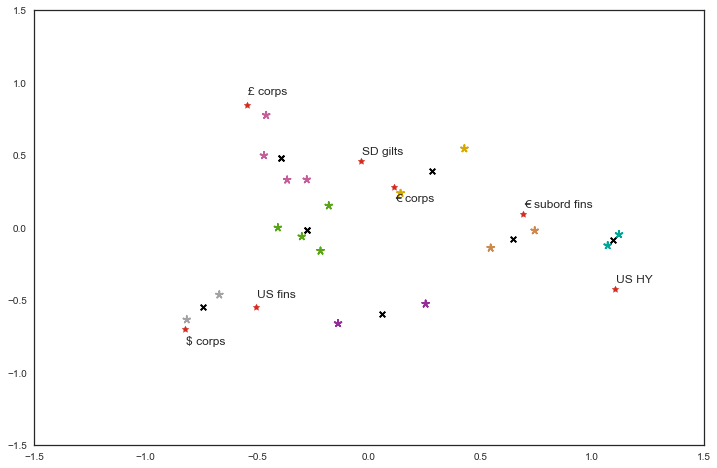

In [36]:
fig = plt.figure(figsize=(12,8))
sns.set_style("white")
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.rcParams.update({'font.size': 12})
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)

ax1.scatter(dat['Factor1'].iloc[:18], dat['Factor2'].iloc[:18], c=dat['Colour'], marker=(5,2), label='')
ax2.scatter(dat['Centroidx'], dat['Centroidy'], s=30, c='k', marker="x", label='')
ax3.scatter(ind['Factor1'],ind['Factor2'], c=rgb2hex(213,43,30), marker=(5,1), label='')

#fig.suptitle('Corporate Bond Fund clusters', fontsize=12, fontweight='bold')

ax3.annotate('£ corps',xy=(ind['Factor1'].iloc[0:1],ind['Factor2'].iloc[0:1]), xytext=(1,10),textcoords='offset pixels')
ax3.annotate('$ corps',xy=(ind['Factor1'].iloc[1:2],ind['Factor2'].iloc[1:2]), xytext=(1,-15),textcoords='offset pixels')
ax3.annotate('SD gilts',xy=(ind['Factor1'].iloc[2:3],ind['Factor2'].iloc[2:3]), xytext=(1,7),textcoords='offset pixels')
ax3.annotate('US fins',xy=(ind['Factor1'].iloc[3:4],ind['Factor2'].iloc[3:4]), xytext=(1,10),textcoords='offset pixels')
ax3.annotate('US HY',xy=(ind['Factor1'].iloc[4:5],ind['Factor2'].iloc[4:5]), xytext=(1,7),textcoords='offset pixels')
ax3.annotate('€ corps',xy=(ind['Factor1'].iloc[5:6],ind['Factor2'].iloc[5:6]), xytext=(1,-15),textcoords='offset pixels')
ax3.annotate('€ subord fins',xy=(ind['Factor1'].iloc[6:7],ind['Factor2'].iloc[6:7]), xytext=(1,7),textcoords='offset pixels')

plt.show()

**Interpreting KMeans clusters**

In [39]:
# Which funds are clustered together? Look at the funds in each cluster.

cluster0 = dat[(dat['Cluster']==0)] #grey
cluster1 = dat[(dat['Cluster']==1)] #yellow 
cluster2 = dat[(dat['Cluster']==2)] #pink
cluster3 = dat[(dat['Cluster']==3)] #light purple
cluster4 = dat[(dat['Cluster']==4)] #light orange 
cluster5 = dat[(dat['Cluster']==5)] #grassgreen
cluster6 = dat[(dat['Cluster']==6)] #turquoise

cluster2

,Factor1,Factor2,Cluster,Name,Colour,Centroidx,Centroidy
0,-0.460030,0.773691,2,Aberdeen Corporate Bond P In,#c55e9b,[-0.393678323939],[0.481752675796]
1,-0.278230,0.329641,2,Aberdeen Sterling Opportunistic Corporate Bd P...,#c55e9b,[-0.393678323939],[0.481752675796]
11,-0.366216,0.327793,2,M&G Strategic Corporate Bond Sterling X Acc,#c55e9b,[-0.393678323939],[0.481752675796]
17,-0.470238,0.495886,2,Royal London Sterling Credit Z,#c55e9b,[-0.393678323939],[0.481752675796]


**Conclusion: what do the clusters tell us?**

*The clusters indicates what segments of the sterling bond market best describe each fund's returns over five years and groups funds accordingly.*

Cluster 0 (grey) contains corporate bond funds whose returns are correlated to US credit.

Cluster 1 (yellow) contains corporate bond funds whose returns are correlated to € corporates and short-dated credit.

Cluster 2 (pink) contains core £ corporate bond funds (both index-level duration and U/W duration).

Cluster 3 (light purple) contains funds whose returns whose returns have affinity to higher yielding assets such as high yield or financials.

Cluster 4 (orange) contains funds whose returns are correlated to € subordinated financials and US HY.

Cluster 5 (dark purple) contains corporate bond funds that have a sizeable US financials allocation.

Cluster 6 (turquoise) contains corporate bond funds whose returns are correlated to US HY.
